In [331]:
import pandas as pd
import matplotlib.pyplot as plt


In [332]:
plt.style.use('ggplot')

In [333]:
daily_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\daily_data.csv", parse_dates=['DATE'], na_values=['SOD', 'PRECIP', 'other_non_numeric_values'])


In [334]:
print("Daily Data:")
print(daily_data.head())

Daily Data:
       STATION                DATE REPORT_TYPE  SOURCE  BackupElements  \
0  72518014735 2015-01-01 23:59:00       SOD         6             NaN   
1  72518014735 2015-01-02 23:59:00       SOD         6             NaN   
2  72518014735 2015-01-03 23:59:00       SOD         6             NaN   
3  72518014735 2015-01-04 23:59:00       SOD         6             NaN   
4  72518014735 2015-01-05 23:59:00       SOD         6             NaN   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0

In [335]:
print("\nBasic Statistics:")
print(daily_data.describe())


Basic Statistics:
            STATION                           DATE  SOURCE  BackupElements  \
count  2.668000e+03                           2668  2668.0             0.0   
mean   7.251801e+10  2018-10-01 14:07:27.346326784     6.0             NaN   
min    7.251801e+10            2015-01-01 23:59:00     6.0             NaN   
25%    7.251801e+10            2016-11-29 17:59:00     6.0             NaN   
50%    7.251801e+10            2018-10-02 11:59:00     6.0             NaN   
75%    7.251801e+10            2020-08-03 05:59:00     6.0             NaN   
max    7.251801e+10            2022-05-31 23:59:00     6.0             NaN   
std    0.000000e+00                            NaN     0.0             NaN   

       BackupElevation  BackupLatitude  BackupLongitude  \
count           2668.0     2668.000000      2668.000000   
mean             260.0       42.689750       -73.828268   
min              260.0       42.681200       -73.831090   
25%              260.0       42.691800    

In [336]:
daily_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\daily_data.csv", parse_dates=['DATE'], na_values=['s', 'T', 'M'])
daily_data['Month'] = daily_data['DATE'].dt.month

In [337]:
monthly_aggregations = daily_data.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})


In [338]:
print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [339]:
average_daily_temperature = daily_data.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()

In [340]:
print("Average Daily Temperature:")
print(average_daily_temperature)

Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


In [341]:
extreme_temperature_days = daily_data[daily_data['DailyMaximumDryBulbTemperature'] > 90]


In [342]:
print("Extreme Temperature Days:")
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

Extreme Temperature Days:
                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


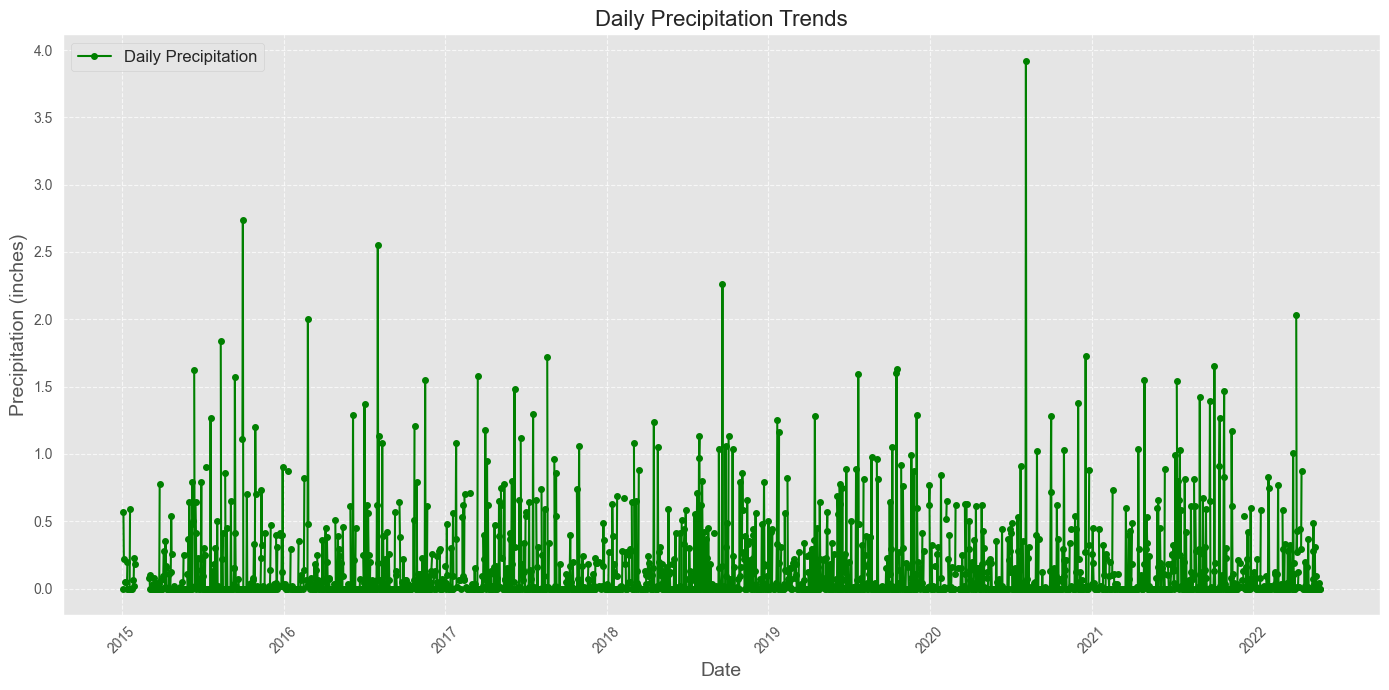

In [343]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], color='green', linestyle='-', marker='o', markersize=4, label='Daily Precipitation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Daily Precipitation Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation (inches)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


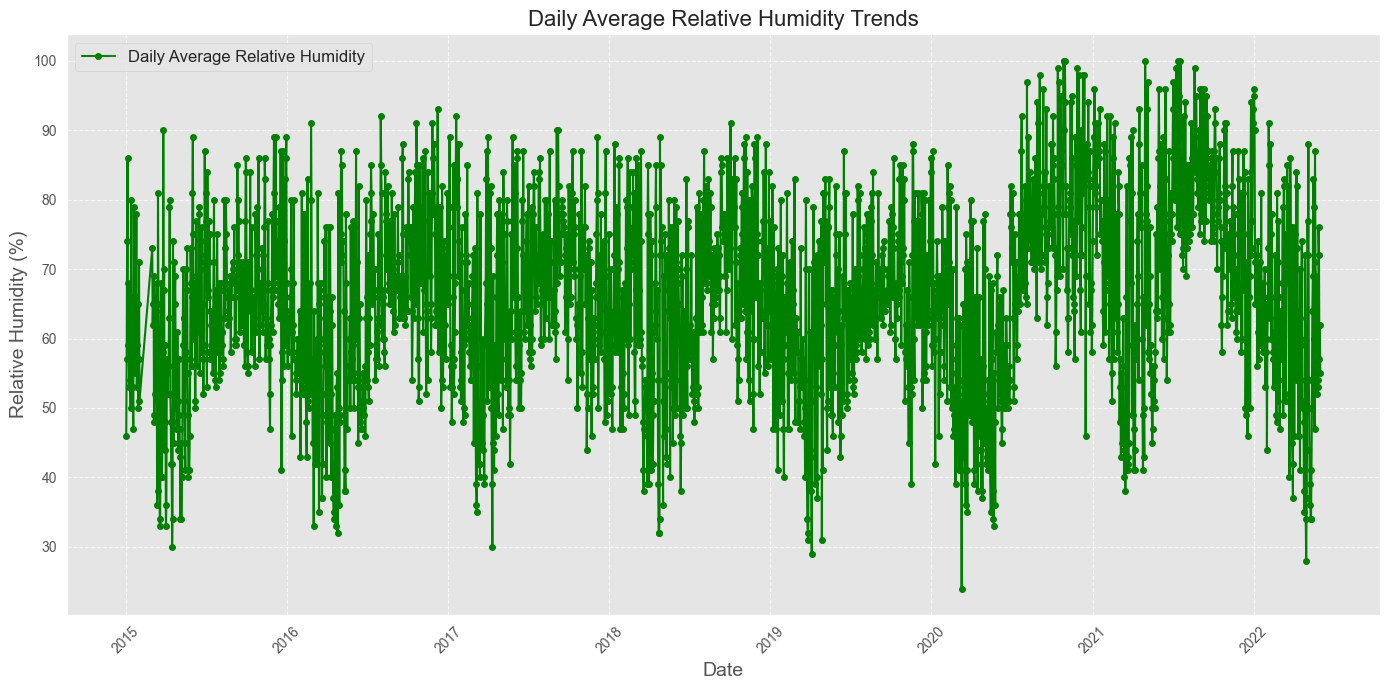

In [344]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(daily_data['DATE'], daily_data['DailyAverageRelativeHumidity'], color='green', linestyle='-', marker='o', markersize=4, label='Daily Average Relative Humidity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Daily Average Relative Humidity Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Humidity (%)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


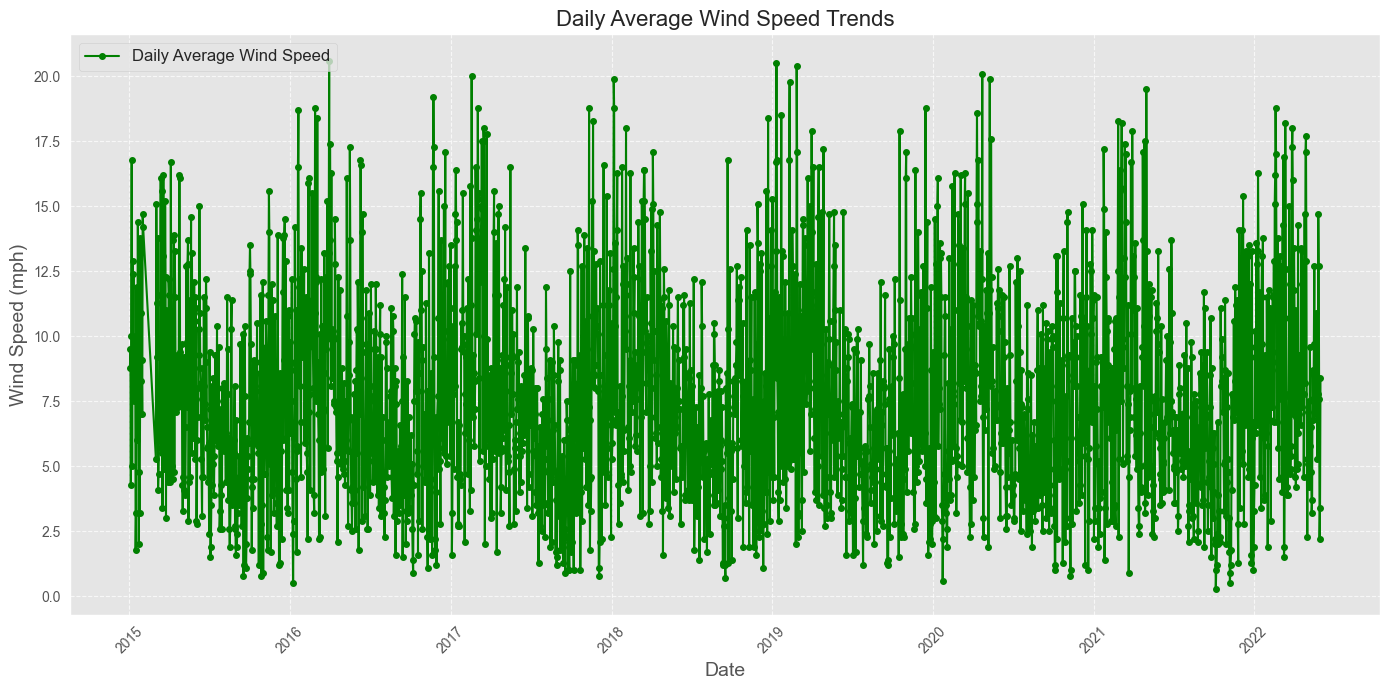

In [345]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWindSpeed'], color='green', linestyle='-', marker='o', markersize=4, label='Daily Average Wind Speed')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Daily Average Wind Speed Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


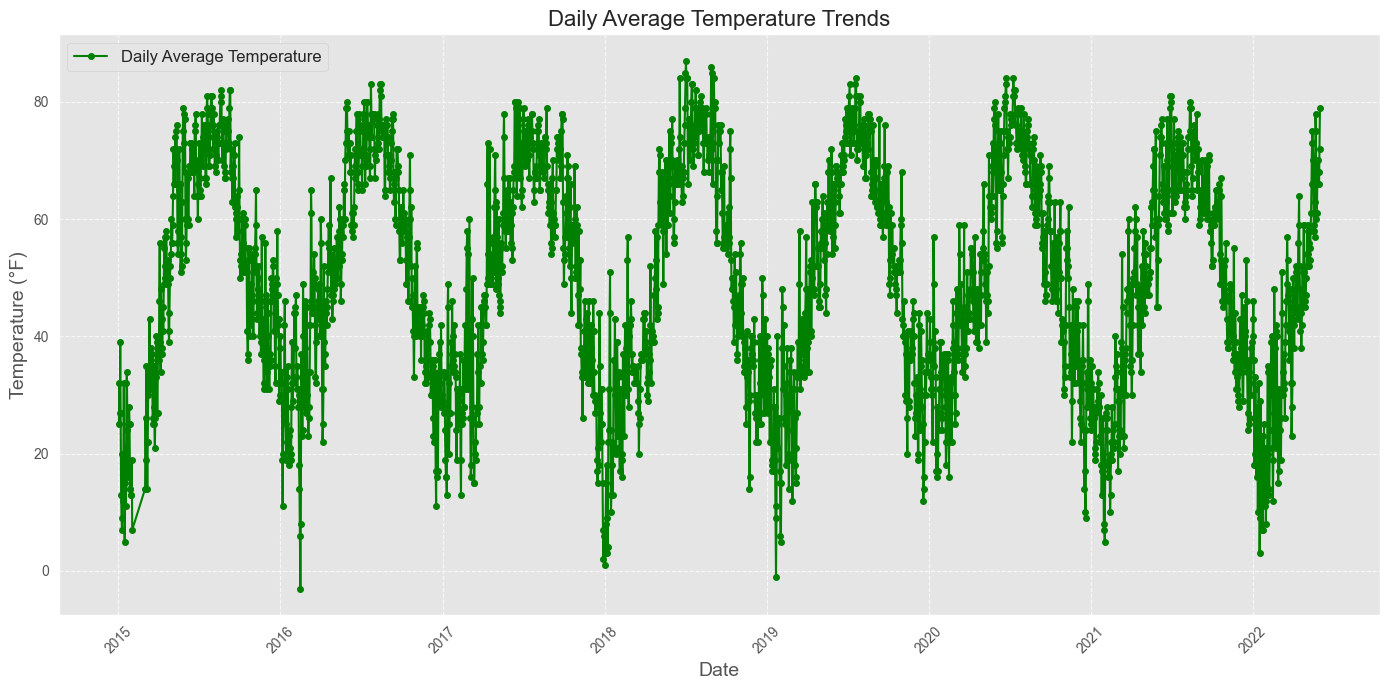

In [346]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(daily_data['DATE'], daily_data['DailyAverageDryBulbTemperature'], color='green', linestyle='-', marker='o', markersize=4, label='Daily Average Temperature')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Daily Average Temperature Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


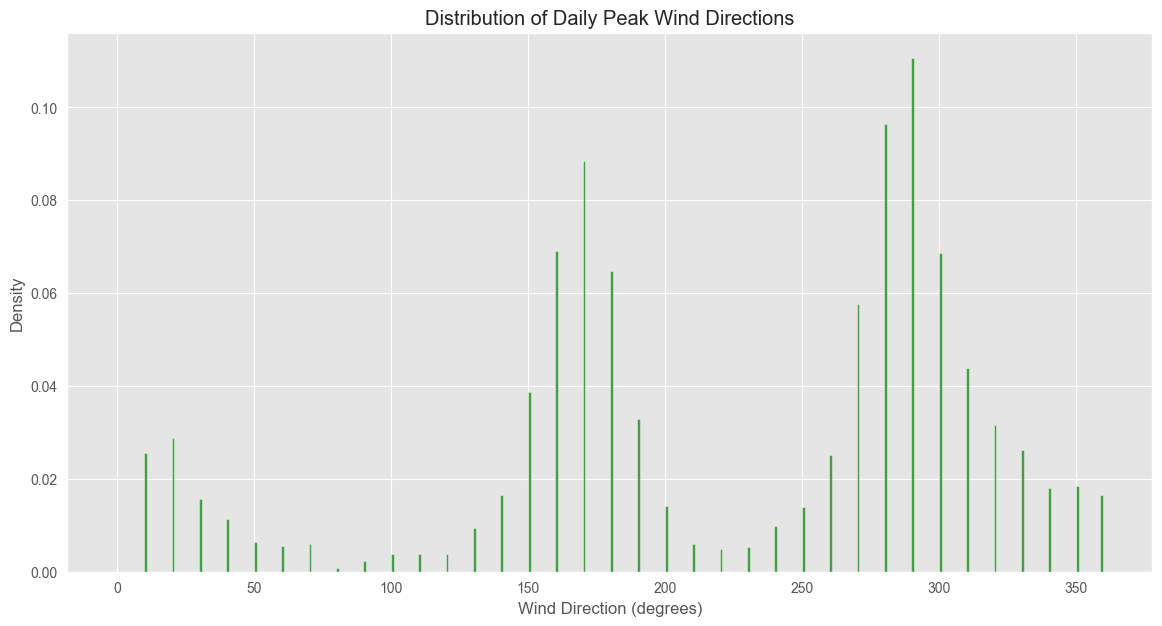

In [347]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.hist(daily_data['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7, color='green')
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()


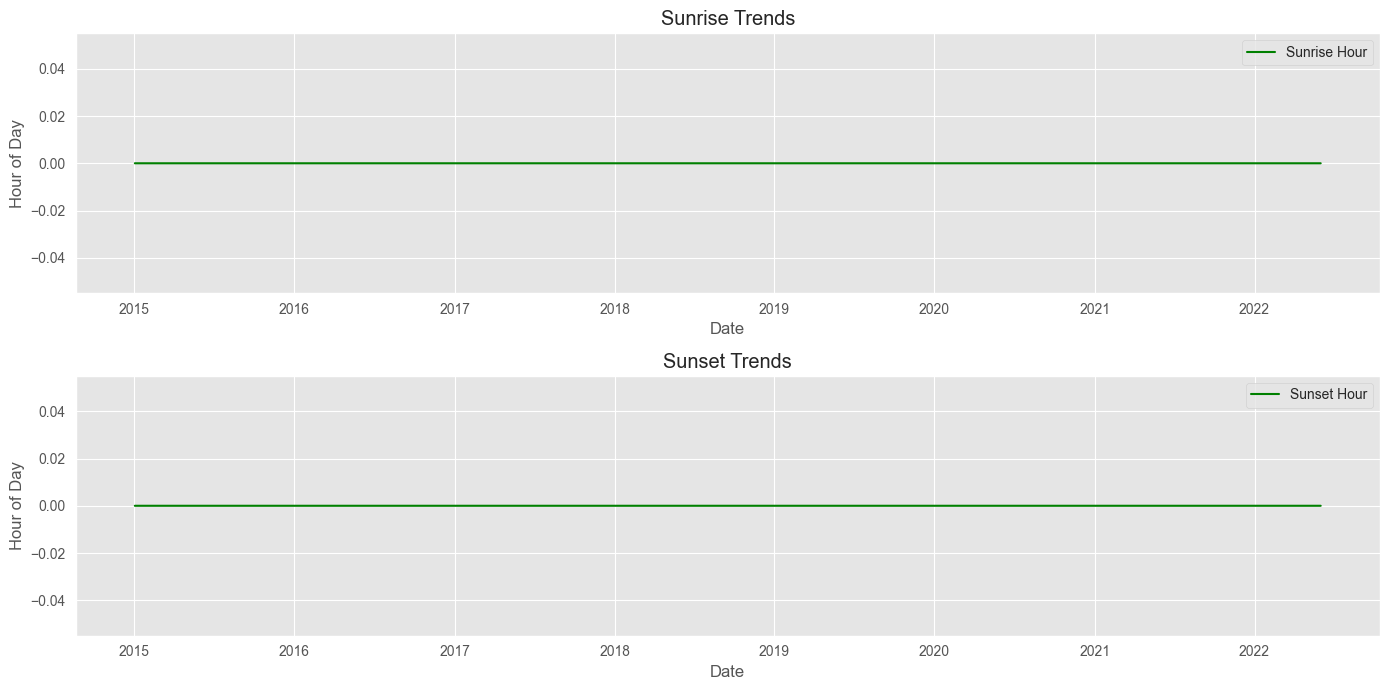

In [348]:
import matplotlib.pyplot as plt
import pandas as pd

daily_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\daily_data.csv", parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

daily_data['Sunrise'] = pd.to_datetime(daily_data['Sunrise'], errors='coerce')
daily_data['Sunset'] = pd.to_datetime(daily_data['Sunset'], errors='coerce')

daily_data['Sunrise_Hour'] = daily_data['Sunrise'].dt.hour
daily_data['Sunset_Hour'] = daily_data['Sunset'].dt.hour

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(daily_data['DATE'], daily_data['Sunrise_Hour'], color='green', label='Sunrise Hour')
plt.title('Sunrise Trends')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(daily_data['DATE'], daily_data['Sunset_Hour'], color='green', label='Sunset Hour')
plt.title('Sunset Trends')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.legend()

plt.tight_layout()  
plt.show()


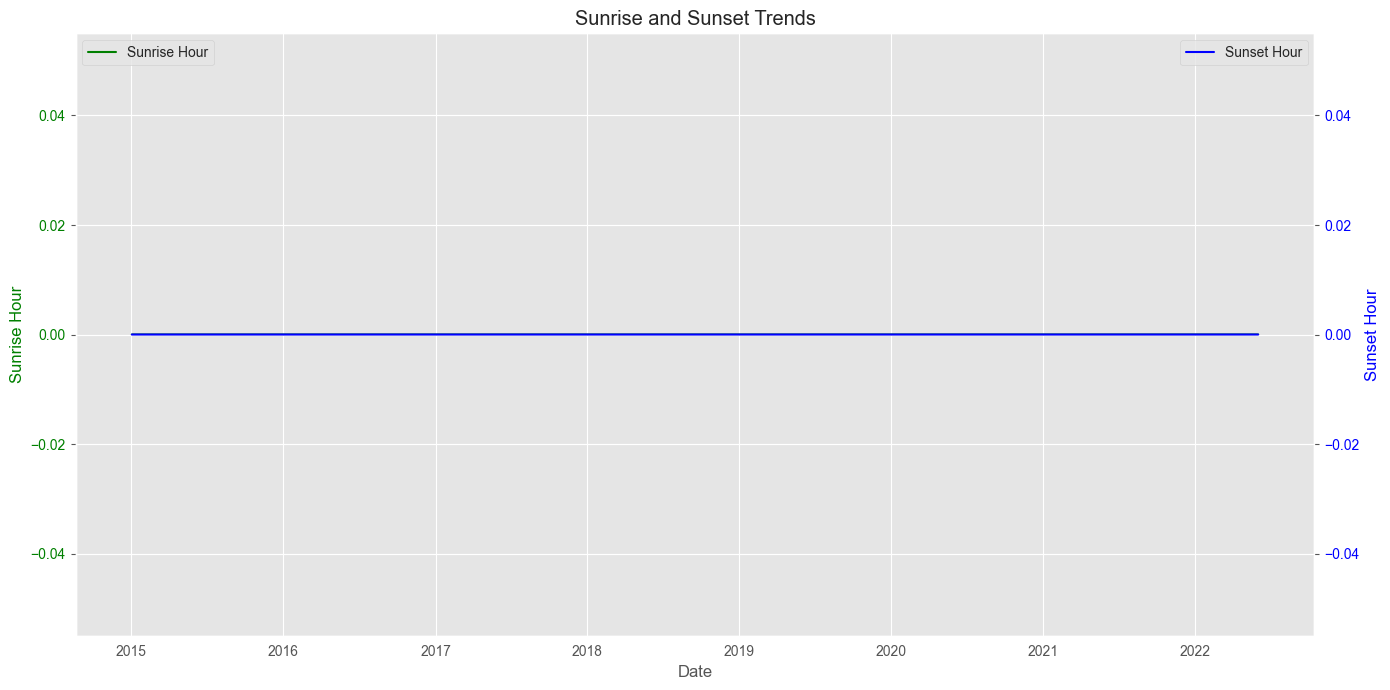

In [349]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
daily_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\daily_data.csv", parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Convert 'Sunrise' and 'Sunset' columns to datetime format
daily_data['Sunrise'] = pd.to_datetime(daily_data['Sunrise'], errors='coerce')
daily_data['Sunset'] = pd.to_datetime(daily_data['Sunset'], errors='coerce')

# Extract hour from sunrise and sunset times
daily_data['Sunrise_Hour'] = daily_data['Sunrise'].dt.hour
daily_data['Sunset_Hour'] = daily_data['Sunset'].dt.hour

# Create a figure and axes objects
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot for Sunrise
ax1.plot(daily_data['DATE'], daily_data['Sunrise_Hour'], color='green', label='Sunrise Hour')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sunrise Hour', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Create a secondary y-axis for Sunset
ax2 = ax1.twinx()
ax2.plot(daily_data['DATE'], daily_data['Sunset_Hour'], color='blue', label='Sunset Hour')
ax2.set_ylabel('Sunset Hour', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title('Sunrise and Sunset Trends')

plt.tight_layout()
plt.show()


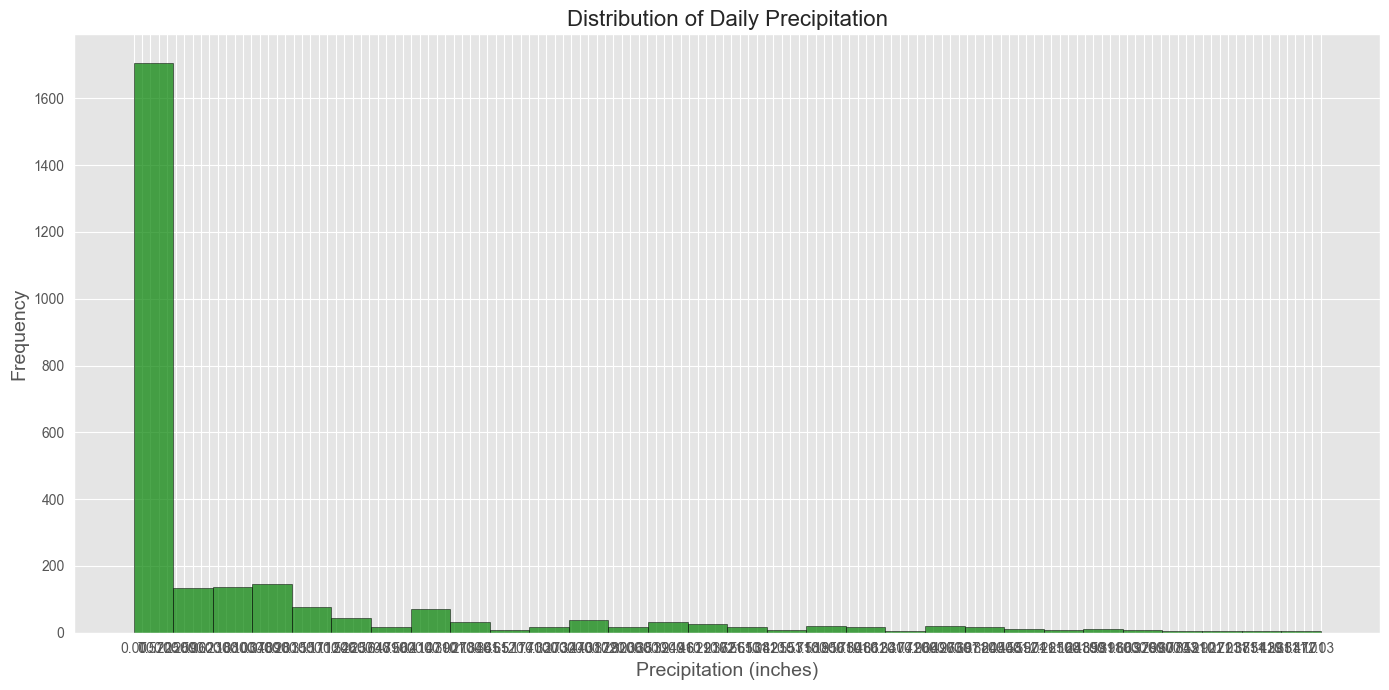

In [350]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the histogram with customized style
plt.hist(daily_data['DailyPrecipitation'].dropna(), bins=30, color='green', edgecolor='black', alpha=0.7)

# Add title and labels with adjusted font sizes
plt.title('Distribution of Daily Precipitation', fontsize=16)
plt.xlabel('Precipitation (inches)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


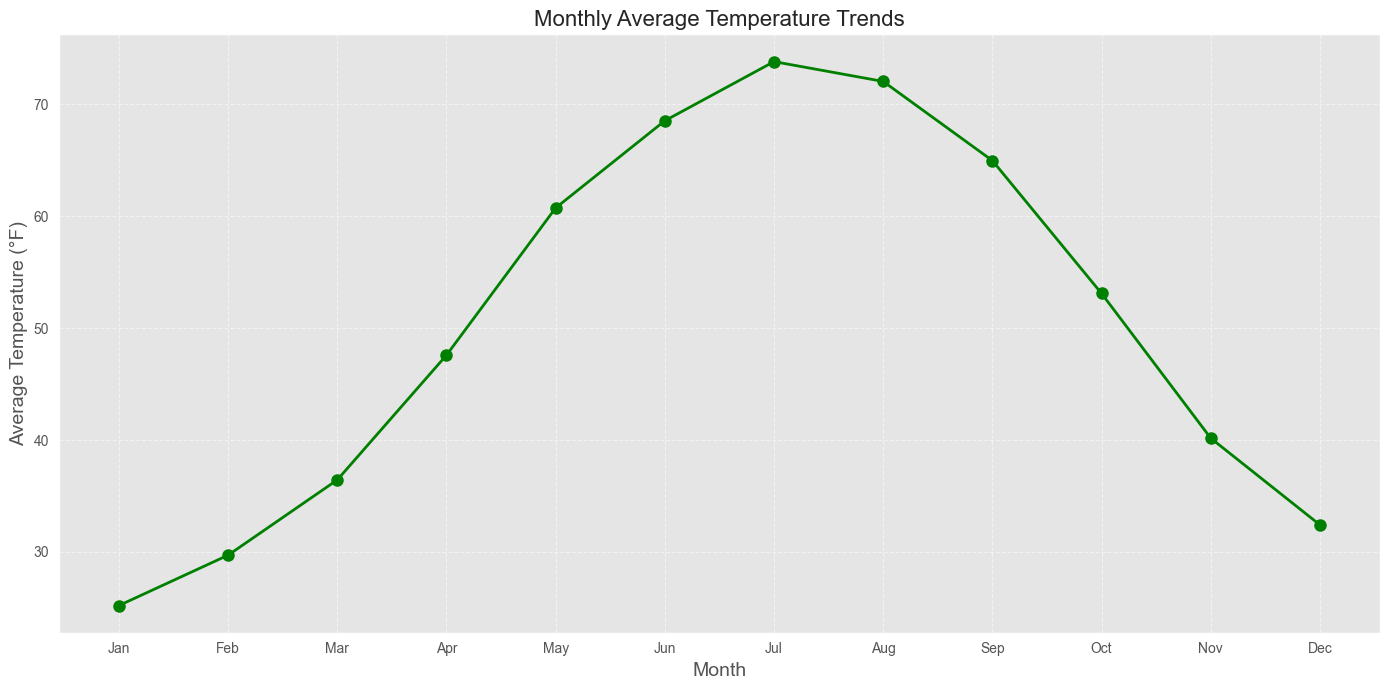

In [351]:
import matplotlib.pyplot as plt

# Assuming 'DATE' column is in datetime format
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature per month
monthly_temperature = daily_data.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

plt.figure(figsize=(14, 7))

# Plot the monthly average temperature with customized style
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)

# Add title and labels with adjusted font sizes
plt.title('Monthly Average Temperature Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Temperature (°F)', fontsize=14)

# Customize the x-axis ticks to show month names
plt.xticks(monthly_temperature.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


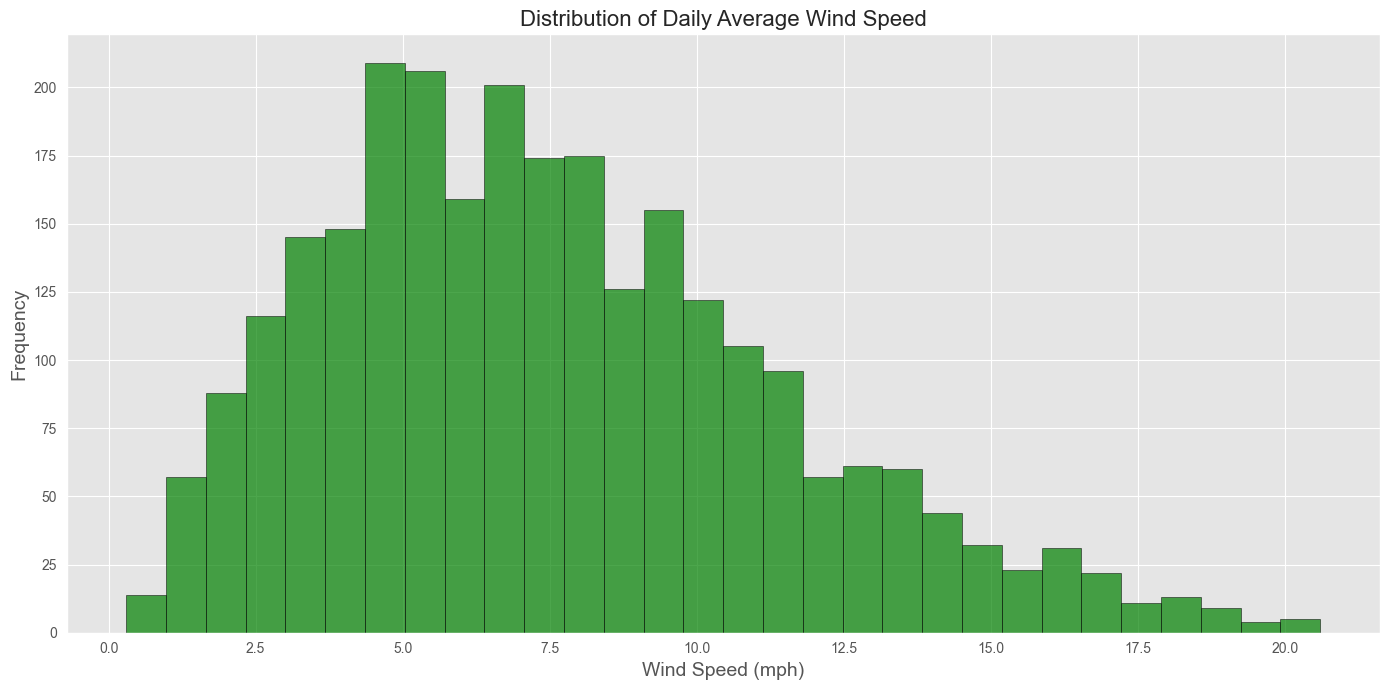

In [352]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the histogram with customized style
plt.hist(daily_data['DailyAverageWindSpeed'].dropna(), bins=30, color='green', edgecolor='black', alpha=0.7)

# Add title and labels with adjusted font sizes
plt.title('Distribution of Daily Average Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


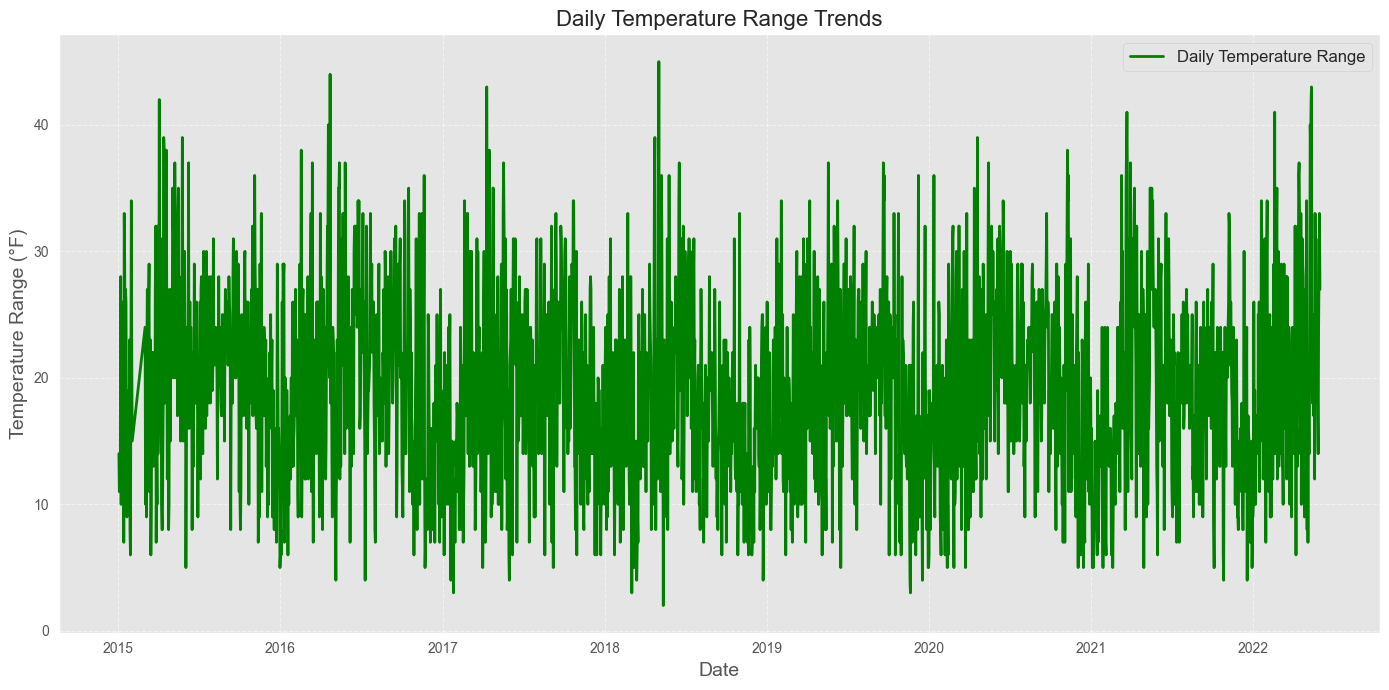

In [353]:
import matplotlib.pyplot as plt

# Calculate daily temperature range
daily_data['TemperatureRange'] = daily_data['DailyMaximumDryBulbTemperature'] - daily_data['DailyMinimumDryBulbTemperature']

plt.figure(figsize=(14, 7))

# Plot the daily temperature range with customized style
plt.plot(daily_data['DATE'], daily_data['TemperatureRange'], color='green', label='Daily Temperature Range', linewidth=2)

# Add title and labels with adjusted font sizes
plt.title('Daily Temperature Range Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature Range (°F)', fontsize=14)

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


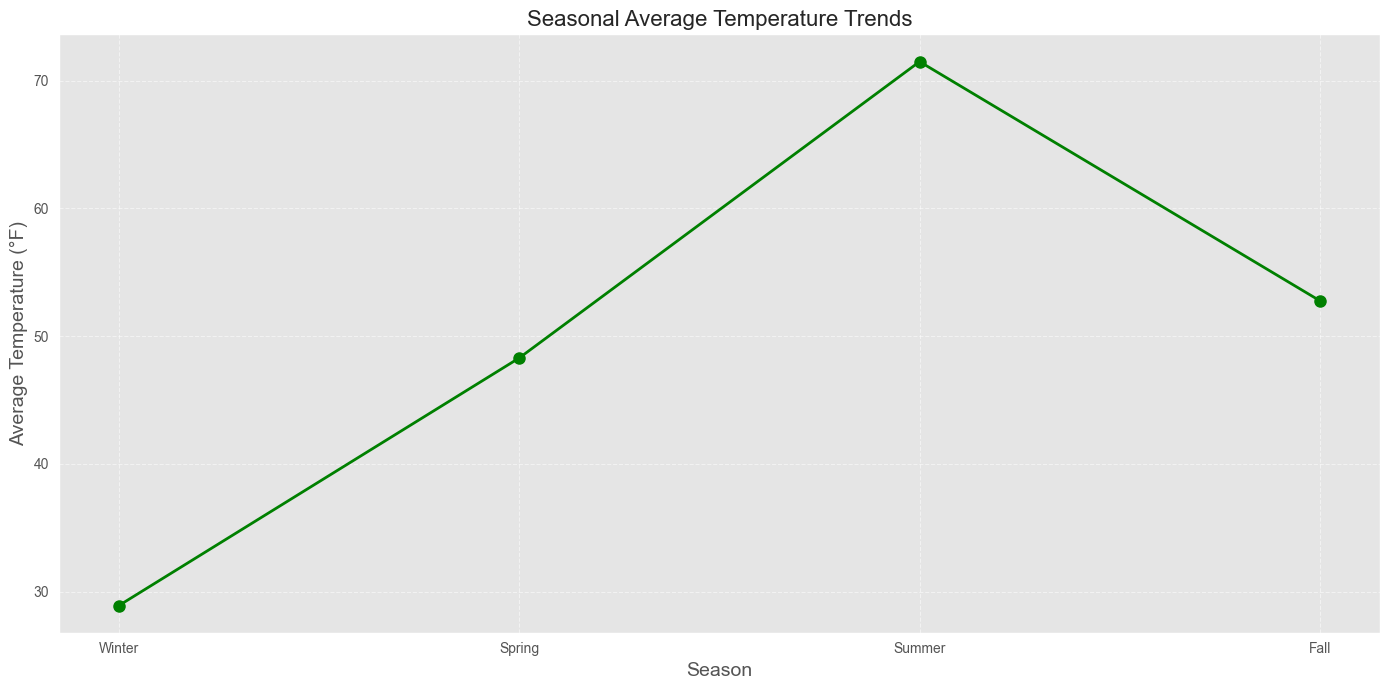

In [354]:
import pandas as pd


daily_data['Season'] = (daily_data['DATE'].dt.month % 12 + 3) // 3


seasonal_temperature = daily_data.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

plt.figure(figsize=(14, 7))

plt.plot(seasonal_temperature.index, seasonal_temperature.values, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)


plt.title('Seasonal Average Temperature Trends', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Temperature (°F)', fontsize=14)


plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])


plt.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()


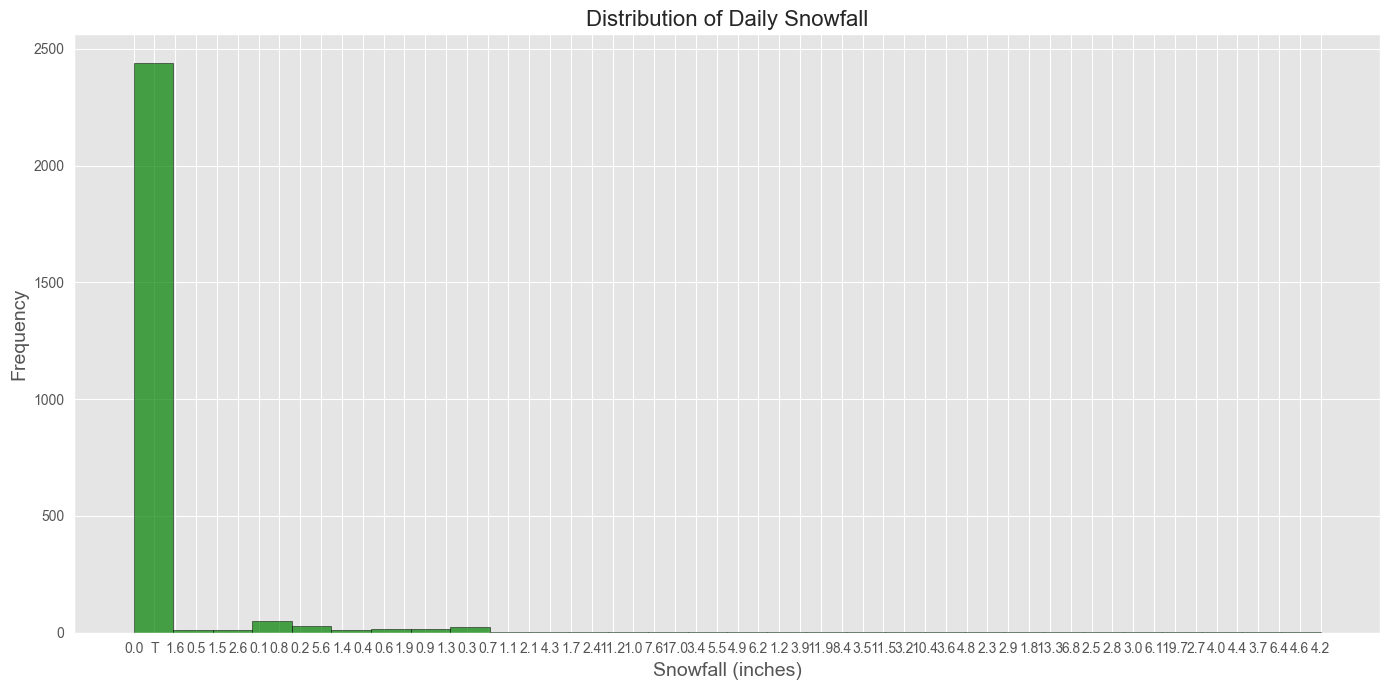

In [355]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))


plt.hist(daily_data['DailySnowfall'].dropna(), bins=30, color='green', edgecolor='black', alpha=0.7)


plt.title('Distribution of Daily Snowfall', fontsize=16)
plt.xlabel('Snowfall (inches)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.tight_layout()
plt.show()


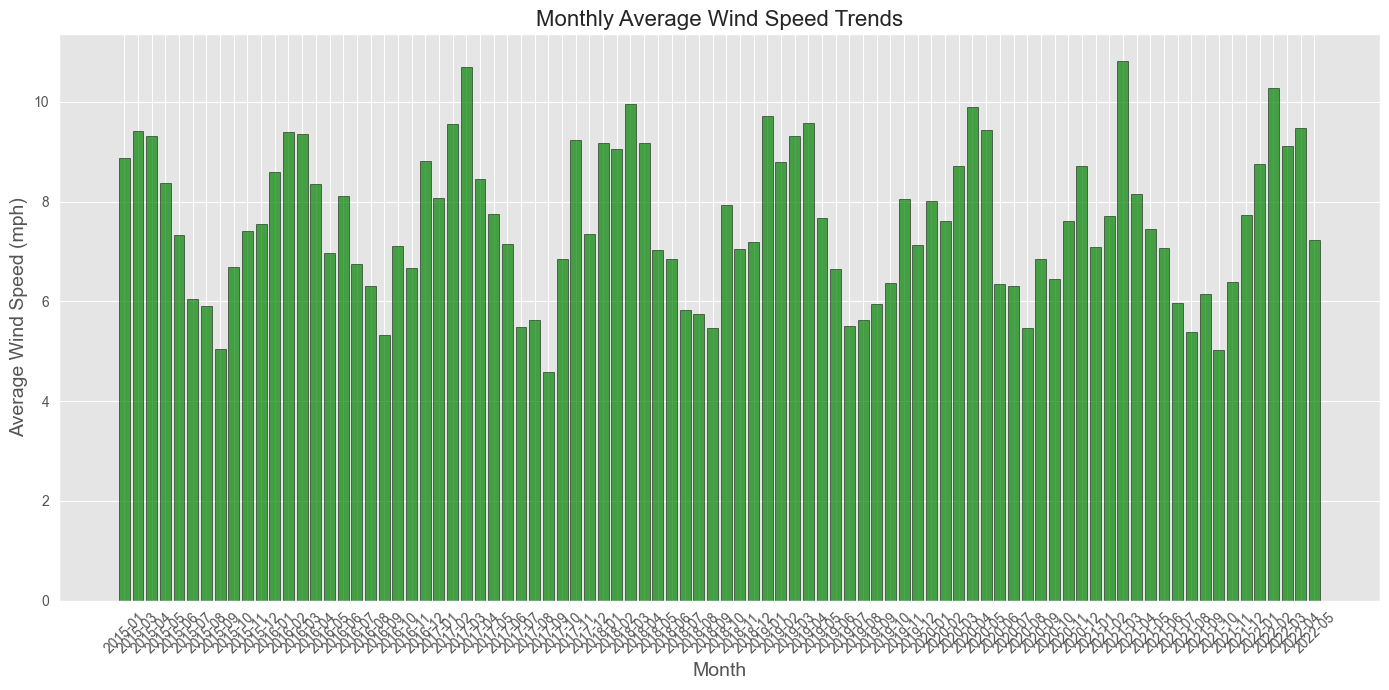

In [356]:
import matplotlib.pyplot as plt


monthly_wind_speed = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyAverageWindSpeed'].mean()

plt.figure(figsize=(14, 7))


plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values, color='green', edgecolor='black', alpha=0.7)

plt.title('Monthly Average Wind Speed Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Wind Speed (mph)', fontsize=14)

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


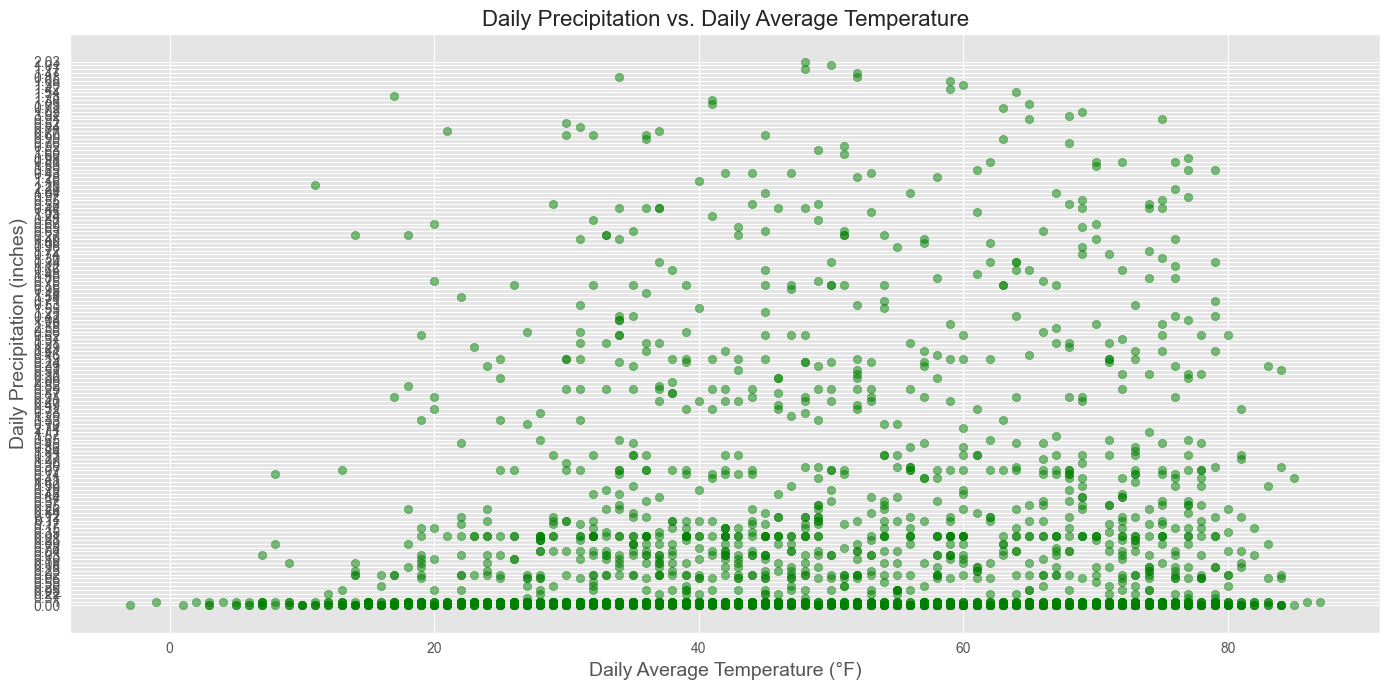

In [357]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.scatter(daily_data['DailyAverageDryBulbTemperature'], daily_data['DailyPrecipitation'], alpha=0.5, color='green')


plt.title('Daily Precipitation vs. Daily Average Temperature', fontsize=16)
plt.xlabel('Daily Average Temperature (°F)', fontsize=14)
plt.ylabel('Daily Precipitation (inches)', fontsize=14)

plt.tight_layout()
plt.show()


In [358]:
import pandas as pd

daily_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\daily_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\hourly_data.csv",  na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'],low_memory=False)
monthly_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\monthly_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\three_hour_data.csv", na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

common_columns = set(daily_data.columns) & set(hourly_data.columns) & set(monthly_data.columns) & set(three_hour_data.columns)

print("Common columns:", common_columns)


Common columns: {'BackupElements', 'BackupLongitude', 'BackupName', 'BackupLatitude', 'WindEquipmentChangeDate', 'DATE', 'BackupElevation', 'SOURCE', 'STATION', 'REPORT_TYPE', 'BackupEquipment'}


In [359]:
import pandas as pd
daily_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\daily_data.csv", parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\hourly_data.csv", parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'],low_memory=False)
monthly_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\monthly_data.csv", parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv(r"C:\dataset\phase 2\climate analysis\three_hour_data.csv", parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

merged_data = pd.merge(daily_data, hourly_data, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, monthly_data, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, three_hour_data, on='DATE', how='outer', suffixes=('_merged', '_three_hour'))

print("Merged Dataset:")
print(merged_data.head())

mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)

print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)

Merged Dataset:
   STATION_daily                DATE  REPORT_TYPE_daily  SOURCE_daily  \
0            NaN 2015-01-01 00:51:00                NaN           NaN   
1            NaN 2015-01-01 01:00:00                NaN           NaN   
2            NaN 2015-01-01 01:51:00                NaN           NaN   
3            NaN 2015-01-01 02:51:00                NaN           NaN   
4            NaN 2015-01-01 03:51:00                NaN           NaN   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   NaN                    NaN                   NaN   
3                   NaN                    NaN                   NaN   
4                   NaN                    NaN                   NaN   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0                   NaN                 

In [360]:
mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)

print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)

Columns with mixed types in hourly_data: Index(['HourlyDewPointTemperature', 'HourlyDryBulbTemperature'], dtype='object')
Data types of columns with mixed types:
HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


In [361]:
missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
STATION_daily                          85575
DATE                                       0
REPORT_TYPE_daily                      88243
SOURCE_daily                           85575
BackupElements_daily                   88243
                                       ...  
HourlyVisibility_three_hour            67400
HourlyWetBulbTemperature_three_hour    67400
HourlyWindDirection_three_hour         67400
HourlyWindSpeed_three_hour             67400
WindEquipmentChangeDate_three_hour     67400
Length: 119, dtype: int64


In [362]:
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       STATION_daily                           DATE  REPORT_TYPE_daily  \
count   2.668000e+03                          88243                0.0   
mean    7.251801e+10  2018-09-16 09:13:44.744851968                NaN   
min     7.251801e+10            2015-01-01 00:51:00                NaN   
25%     7.251801e+10            2016-11-08 03:21:00                NaN   
50%     7.251801e+10            2018-09-15 22:00:00                NaN   
75%     7.251801e+10            2020-07-25 02:21:00                NaN   
max     7.251801e+10            2022-05-31 23:59:00                NaN   
std     0.000000e+00                            NaN                NaN   

       SOURCE_daily  BackupElements_daily  BackupElevation_daily  \
count        2668.0                   0.0                 2668.0   
mean            6.0                   NaN                  260.0   
min             6.0                   NaN                  260.0   
25%             6.0                   NaN

First few rows of DataFrame:
   STATION_daily                DATE  REPORT_TYPE_daily  SOURCE_daily  \
0            NaN 2015-01-01 00:51:00                NaN           NaN   
1            NaN 2015-01-01 01:00:00                NaN           NaN   
2            NaN 2015-01-01 01:51:00                NaN           NaN   
3            NaN 2015-01-01 02:51:00                NaN           NaN   
4            NaN 2015-01-01 03:51:00                NaN           NaN   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   NaN                    NaN                   NaN   
3                   NaN                    NaN                   NaN   
4                   NaN                    NaN                   NaN   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0                   NaN    

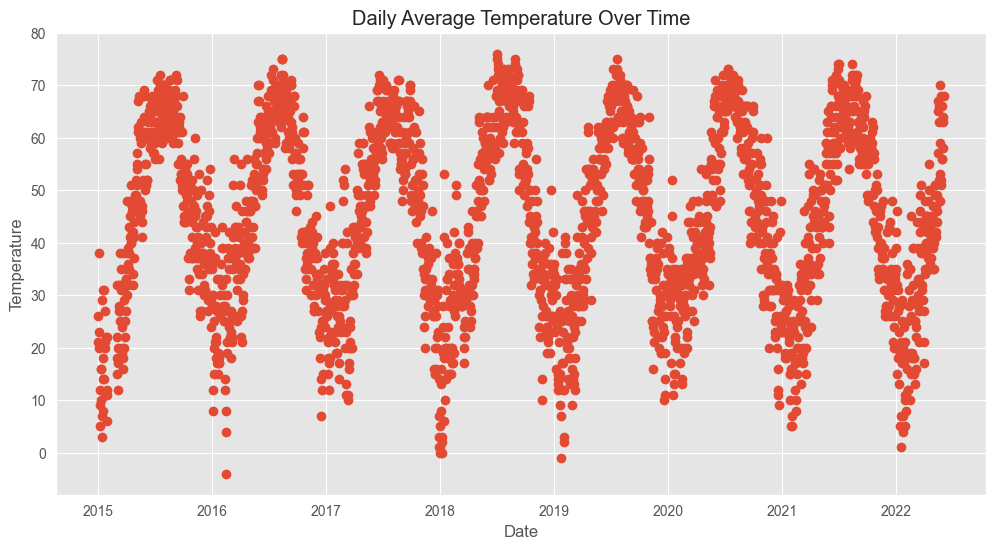

In [363]:
import matplotlib.pyplot as plt

print("First few rows of DataFrame:")
print(merged_data.head())

plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE'], merged_data['DailyAverageWetBulbTemperature'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Average Temperature Over Time')
plt.grid(True) 
plt.show()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88243 entries, 0 to 88242
Columns: 119 entries, STATION_daily to WindEquipmentChangeDate_three_hour
dtypes: datetime64[ns](1), float64(86), object(32)
memory usage: 80.1+ MB
None


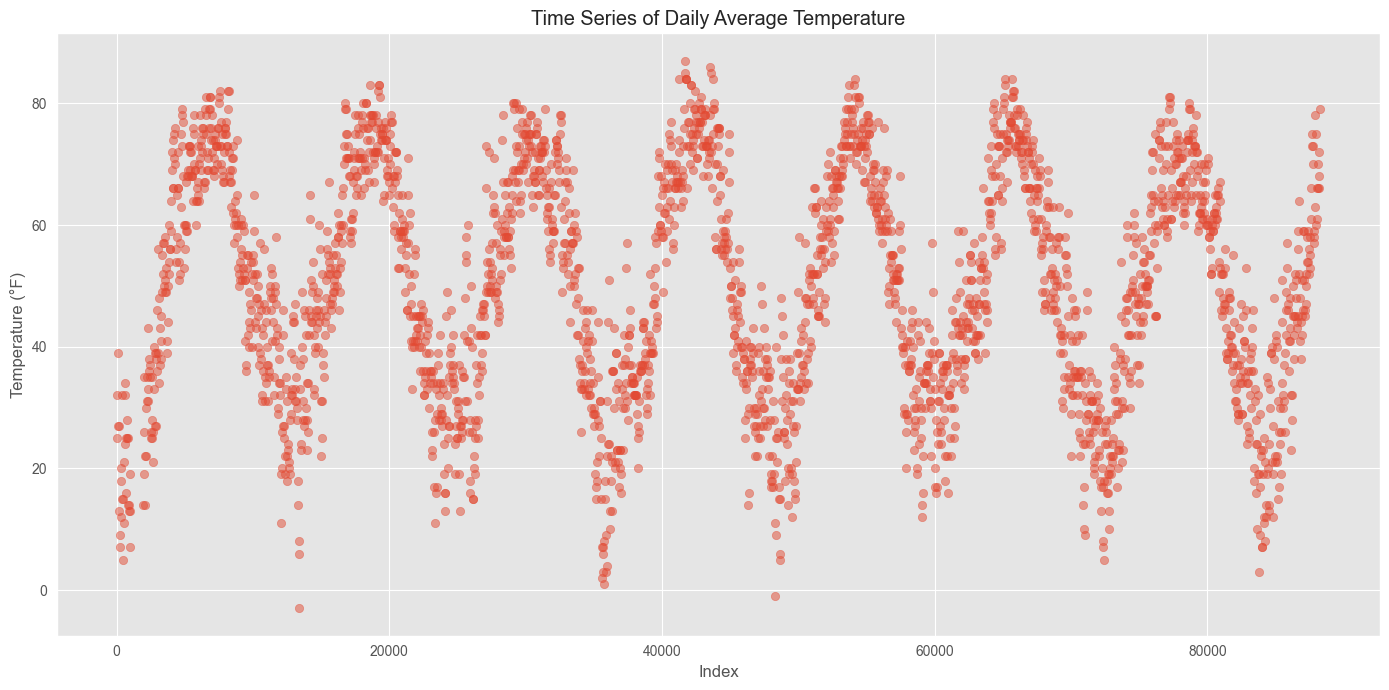

In [364]:
import matplotlib.pyplot as plt

print("DataFrame Info:")
print(merged_data.info())

plt.figure(figsize=(14, 7))
plt.scatter(merged_data.index, merged_data['DailyAverageDryBulbTemperature'], alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Temperature (°F)')
plt.title('Time Series of Daily Average Temperature')
plt.tight_layout()
plt.show()


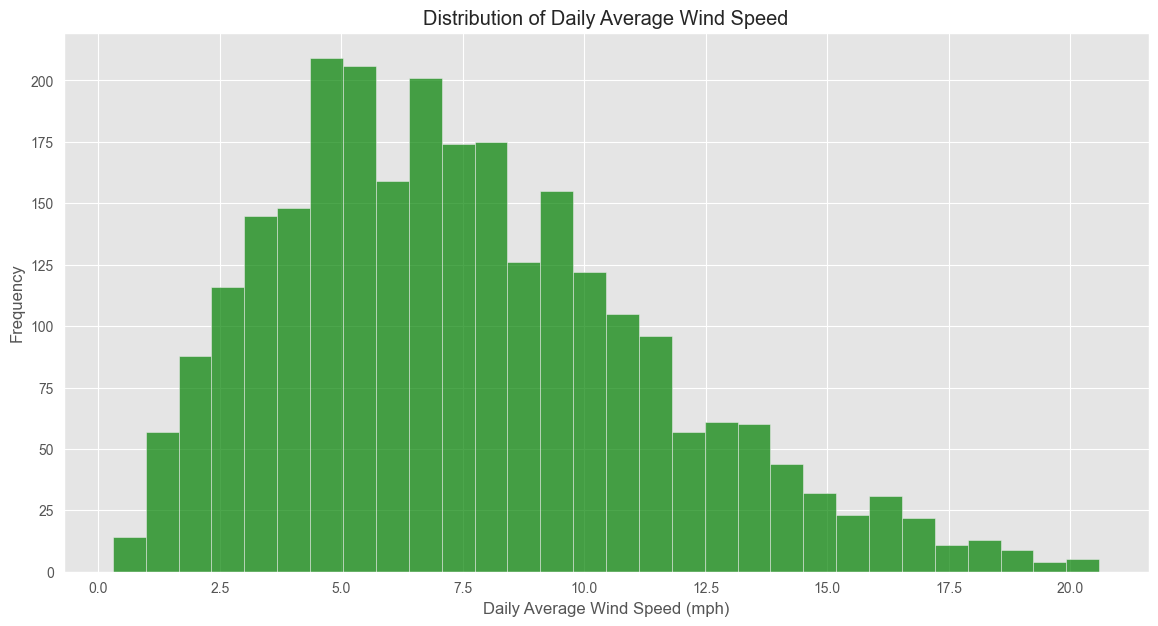

In [365]:
plt.figure(figsize=(14, 7))
plt.hist(merged_data['DailyAverageWindSpeed'], bins=30, color='green', alpha=0.7)
plt.xlabel('Daily Average Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Average Wind Speed')
plt.show()

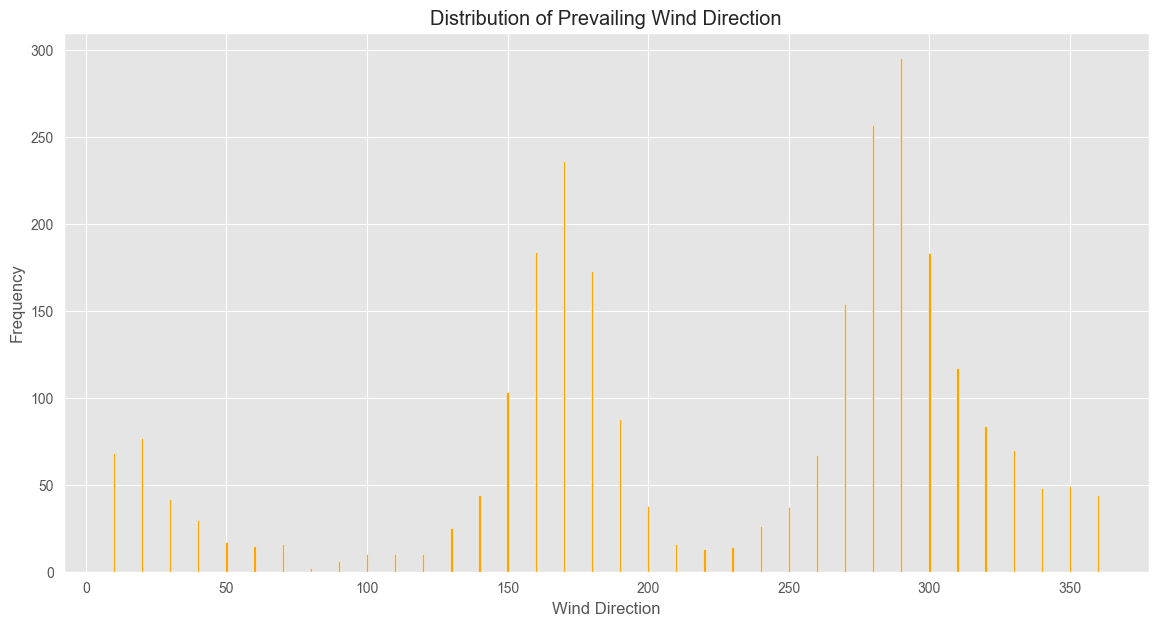

In [366]:
plt.figure(figsize=(14, 7))
plt.bar(merged_data['DailyPeakWindDirection'].value_counts().index, merged_data['DailyPeakWindDirection'].value_counts().values, color='orange')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Distribution of Prevailing Wind Direction')
plt.show()

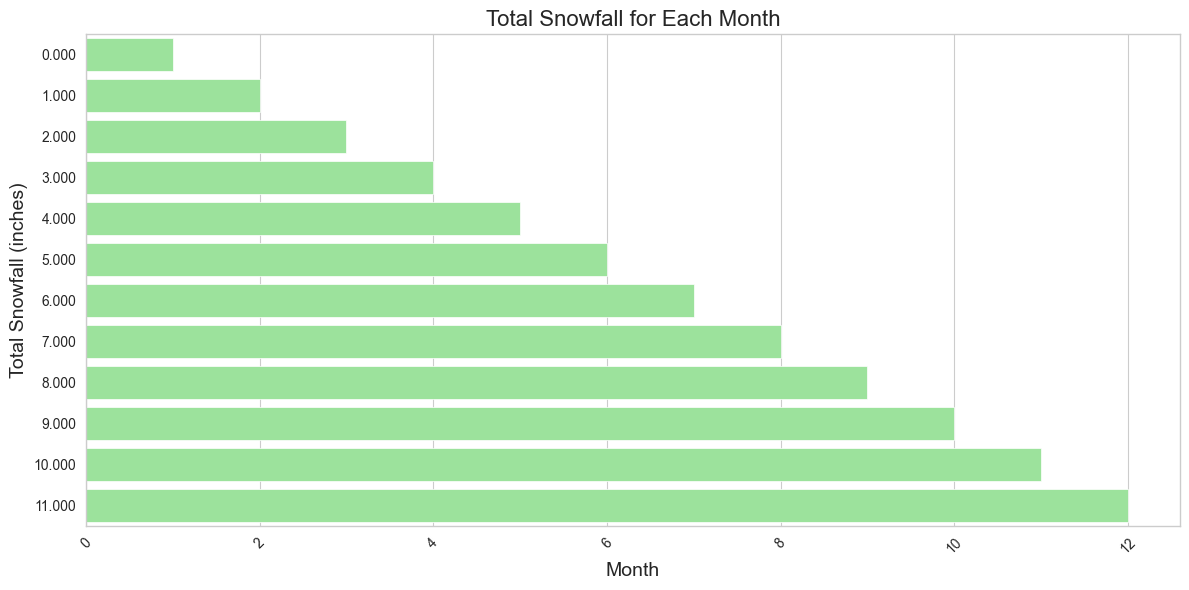

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

monthly_snowfall = daily_data.groupby(daily_data['DATE'].dt.month)['DailySnowfall'].sum().reset_index()

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(12, 6))
sns.barplot(x='DATE', y='DailySnowfall', data=monthly_snowfall, color='lightgreen')  
plt.title('Total Snowfall for Each Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Snowfall (inches)', fontsize=14)
plt.xticks(rotation=45)  

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.3f}'))

plt.tight_layout()  
plt.show()



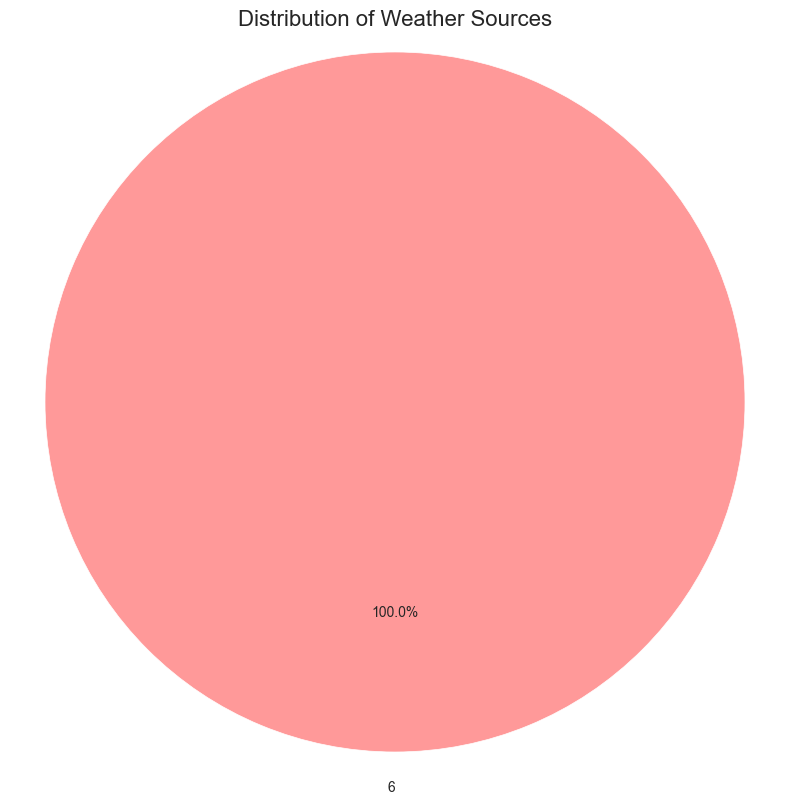

In [368]:
import matplotlib.pyplot as plt

source_distribution = daily_data['SOURCE'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Weather Sources', fontsize=16)
plt.axis('equal')

plt.tight_layout() 
plt.show()


In [369]:
print(hourly_data[['HourlyDewPointTemperature', 'HourlyDryBulbTemperature']].dtypes)

HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


In [370]:
unique_conditions_daily = daily_data['REPORT_TYPE'].unique()
unique_conditions_hourly = hourly_data['REPORT_TYPE'].unique()
unique_conditions_three_hour = three_hour_data['REPORT_TYPE'].unique()

all_unique_conditions = set(unique_conditions_daily) | set(unique_conditions_hourly) | set(unique_conditions_three_hour)

print("Unique Weather Conditions:")
for condition in all_unique_conditions:
    print(condition)

Unique Weather Conditions:
FM-12
FM-15
nan


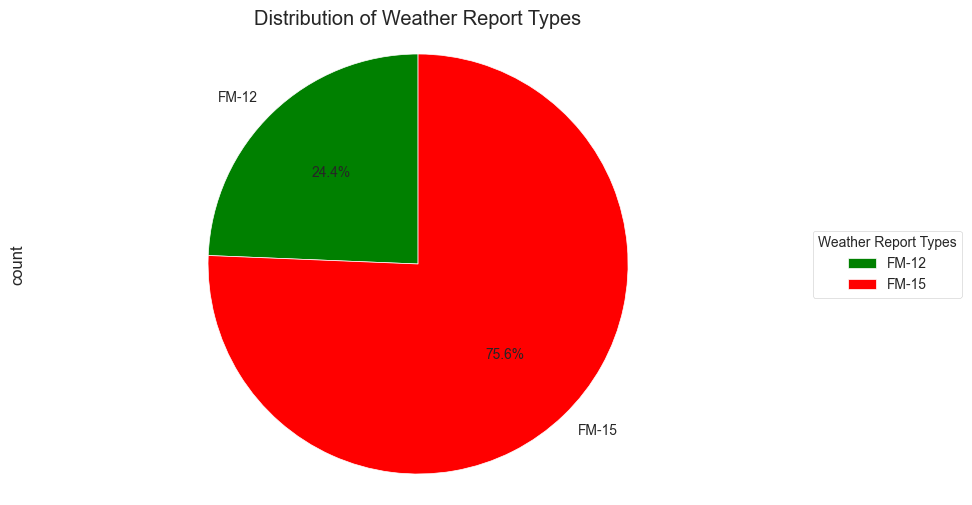

In [371]:
import matplotlib.pyplot as plt

report_types_daily = daily_data['REPORT_TYPE'].value_counts()
report_types_hourly = hourly_data['REPORT_TYPE'].value_counts()
report_types_three_hour = three_hour_data['REPORT_TYPE'].value_counts()

combined_report_types = report_types_daily.add(report_types_hourly, fill_value=0)
combined_report_types = combined_report_types.add(report_types_three_hour, fill_value=0)

plt.figure(figsize=(10, 6))
colors = ['green', 'red'] 
combined_report_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

plt.legend(combined_report_types.index, title='Weather Report Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Weather Report Types')
plt.axis('equal') 
plt.show()
